In [1]:
# Imports
import pandas as pd

# Extracting

### Extracting commonwealth electorate data

In [2]:
# Reading in the csv and viewing as a dataframe
education_level_df = pd.read_csv("Resources/commonwealth_electorate_data_Table8.csv")

education_level_df

,Unnamed: 0,Year 12 or equivalent completion (people aged 20 to 24 years),Certificate III or higher qualification (people aged 15 years and over),Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,Adelaide,82.4%,49.3%,NaN,NaN
2,Aston,79.7%,49.3%,NaN,NaN
3,Ballarat,68.6%,45.1%,NaN,NaN
4,Banks,83.4%,47.8%,NaN,NaN
...,...,...,...,...,...
148,Whitlam,62.2%,42.8%,NaN,NaN
149,Wide Bay,63.4%,40.0%,NaN,NaN
150,Wills,84.2%,52.0%,NaN,NaN
151,Wright,70.0%,41.6%,NaN,NaN


# Transforming

### Removing NaNs

In [3]:
# Checking the number of NaNs in each column
education_level_df.isnull().sum()

Unnamed: 0                                                                   2
Year 12 or equivalent completion (people aged 20 to 24 years)                2
Certificate III or higher qualification (people aged 15 years and over)      2
Unnamed: 3                                                                 153
Unnamed: 4                                                                 153
dtype: int64

This indicates that the columns 'Unnamed: 3' and 'Unnamed: 4' contain only NaN values and can be removed.

In [4]:
# Dropping the columns with NaN values
education_level_df = education_level_df.drop(columns = ["Unnamed: 3", "Unnamed: 4"])
education_level_df

,Unnamed: 0,Year 12 or equivalent completion (people aged 20 to 24 years),Certificate III or higher qualification (people aged 15 years and over)
0,NaN,NaN,NaN
1,Adelaide,82.4%,49.3%
2,Aston,79.7%,49.3%
3,Ballarat,68.6%,45.1%
4,Banks,83.4%,47.8%
...,...,...,...
148,Whitlam,62.2%,42.8%
149,Wide Bay,63.4%,40.0%
150,Wills,84.2%,52.0%
151,Wright,70.0%,41.6%


In [5]:
# Removing the rows with Nan values, row 0 and row 152. This should leave 151 rows.
education_level_df = education_level_df.dropna()
education_level_df

,Unnamed: 0,Year 12 or equivalent completion (people aged 20 to 24 years),Certificate III or higher qualification (people aged 15 years and over)
1,Adelaide,82.4%,49.3%
2,Aston,79.7%,49.3%
3,Ballarat,68.6%,45.1%
4,Banks,83.4%,47.8%
5,Barker,57.9%,34.9%
...,...,...,...
147,Werriwa,75.7%,37.3%
148,Whitlam,62.2%,42.8%
149,Wide Bay,63.4%,40.0%
150,Wills,84.2%,52.0%


### Renaming columns

In [6]:
# renaming columns
education_level_df.columns = ['electoral_division', 'year_12_completion_percent', 'higher_education_completion_percent']
education_level_df.head()

,electoral_division,year_12_completion_percent,higher_education_completion_percent
1,Adelaide,82.4%,49.3%
2,Aston,79.7%,49.3%
3,Ballarat,68.6%,45.1%
4,Banks,83.4%,47.8%
5,Barker,57.9%,34.9%


### Assessing and converting datatypes

In [7]:
# Checking datatypes
education_level_df.dtypes

electoral_division                     object
year_12_completion_percent             object
higher_education_completion_percent    object
dtype: object

The datatypes of year_12_completion(%) and higher_education_completion(%) are objects. The percentage sign needs to be removed and datatype changed for ease of use later.

In [8]:
# Converting data type of 'year_12_completion(%)' and 'higher_education_completion(%)' columns 
# First converting columns of objects to strings

education_df = education_level_df.copy()
education_df["year_12_completion_percent"] = education_df["year_12_completion_percent"].astype('str')
education_df["higher_education_completion_percent"] = education_df["higher_education_completion_percent"].astype('str')

In [9]:
# Then converting columns of strings to floats, removing percentage sign
education_df["year_12_completion_percent"] = education_df["year_12_completion_percent"].str.replace("%","").astype(float)
education_df["higher_education_completion_percent"] = education_df["higher_education_completion_percent"].str.replace("%","").astype(float)


In [10]:
# Previewing the dataframe
education_df.head()

,electoral_division,year_12_completion_percent,higher_education_completion_percent
1,Adelaide,82.4,49.3
2,Aston,79.7,49.3
3,Ballarat,68.6,45.1
4,Banks,83.4,47.8
5,Barker,57.9,34.9


In [11]:
# Checking datatypes
education_df.dtypes

electoral_division                      object
year_12_completion_percent             float64
higher_education_completion_percent    float64
dtype: object

### Merging with a second dataframe

Want to add the electoral division id to the election_results dataframe. This will be the index and a key later on.

In [12]:
# Reading in electoral division csv
electoral_division_df = pd.read_csv("01-output_electoral_division/electoral_division.csv")
electoral_division_df.head()

,division_id,electoral_division,state
0,179,Adelaide,SA
1,197,Aston,VIC
2,198,Ballarat,VIC
3,103,Banks,NSW
4,180,Barker,SA


In [13]:
# dropping state column
electoral_division_df = electoral_division_df.drop(columns = ["state"])
electoral_division_df.head()

,division_id,electoral_division
0,179,Adelaide
1,197,Aston
2,198,Ballarat
3,103,Banks
4,180,Barker


In [14]:
# merging the dataframes
# merged_df = education_level_df.merge(electoral_division_df, how = 'left', on = 'electoral_division')
merged_df = electoral_division_df.merge(education_df, how = 'left', on = 'electoral_division')
merged_df.head()

,division_id,electoral_division,year_12_completion_percent,higher_education_completion_percent
0,179,Adelaide,82.4,49.3
1,197,Aston,79.7,49.3
2,198,Ballarat,68.6,45.1
3,103,Banks,83.4,47.8
4,180,Barker,57.9,34.9


In [15]:
# Setting the index
merged_df = merged_df.set_index('division_id')
merged_df.head()

,electoral_division,year_12_completion_percent,higher_education_completion_percent
division_id,,,
179,Adelaide,82.4,49.3
197,Aston,79.7,49.3
198,Ballarat,68.6,45.1
103,Banks,83.4,47.8
180,Barker,57.9,34.9


# Exploratory Data Analysis

Will construct some bar charts to visualusalise the data.

First plotting Year 12 Completion column.

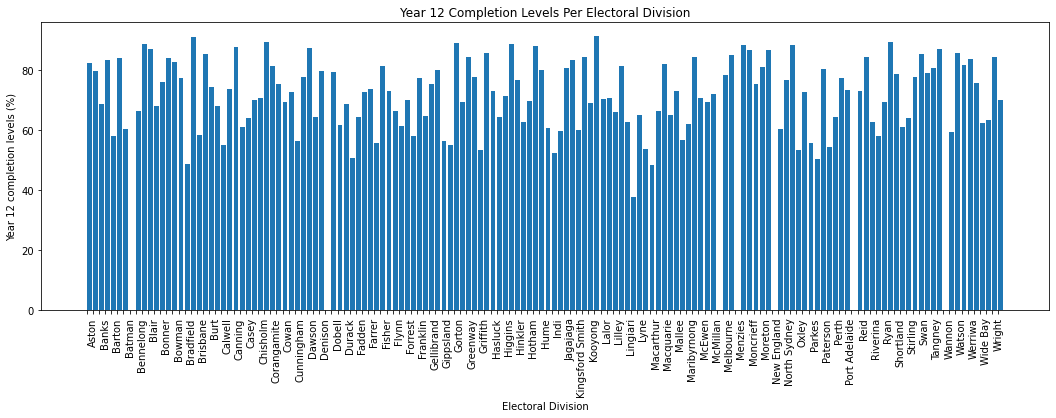

In [16]:
import matplotlib.pyplot as plt

# setting the size of the figure
fig = plt.figure(figsize=(14, 4))
ax = fig.add_axes([0,0,1,1])
# plotting the bar chart
ax.bar(merged_df['electoral_division'], merged_df['year_12_completion_percent'], align='edge')

# setting labels
plt.title('Year 12 Completion Levels Per Electoral Division')
plt.xlabel('Electoral Division')
plt.ylabel('Year 12 completion levels (%)')

# rotating the x labels and displaying only every second one 
plt.xticks(rotation = 90)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
plt.show()


The bar plot has identified seven Electoral Divisions that are displaying no values for Year 12 Completion levels. This needs to be investigated further.

Will firstly check whether these Electoral Divisions just have low or 0% values for the Year 12 Completion percentage.

In [17]:
# Using loc to view Electoral Divisions that have Year 12 Completion percentages between 0 and 20%

low_numbers = merged_df.loc[(merged_df['year_12_completion_percent'] >= 0) & (merged_df['year_12_completion_percent'] <= 20), :]
low_numbers


,electoral_division,year_12_completion_percent,higher_education_completion_percent
division_id,,,


This gives no result, indicating that the Electoral Divisions do not have low values but instead may have empty cells or NaNs.

Checking this by considering a specific Electoral Division, 'denison', as it was shown in the bar chart to have no value.

In [18]:
# Using loc to reduce the dataframe to only show the electoral division 'Denison'
denison = merged_df.loc[(merged_df['electoral_division'] == 'Denison'),:]
denison

,electoral_division,year_12_completion_percent,higher_education_completion_percent
division_id,,,
194,Denison,NaN,NaN


This confirms that the lack of data is due to NaNs.

Will now plot the Higher Education Completion column to see if a similar pattern emerges and it too contains NaNs.

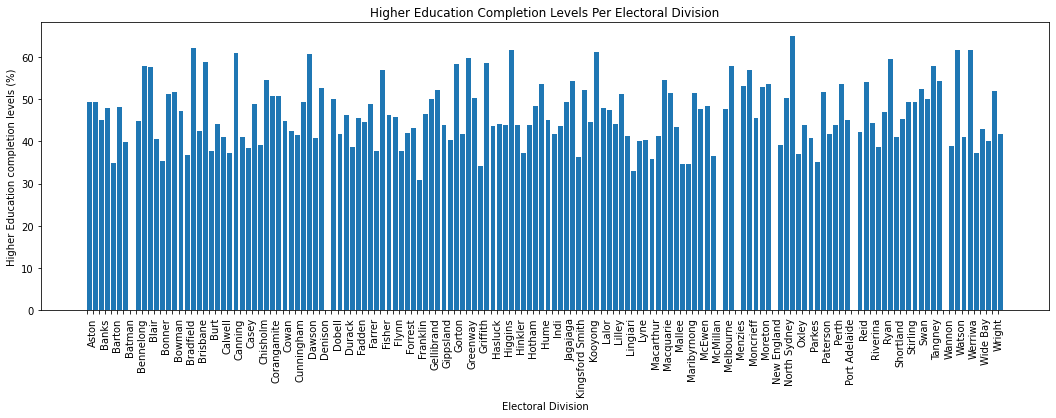

In [19]:
# setting the size of the figure
fig = plt.figure(figsize=(14, 4))
ax = fig.add_axes([0,0,1,1])
# plotting the bar chart
ax.bar(merged_df['electoral_division'], merged_df['higher_education_completion_percent'], align='edge')

# setting labels
plt.title('Higher Education Completion Levels Per Electoral Division')
plt.xlabel('Electoral Division')
plt.ylabel('Higher Education completion levels (%)')

# rotating the x labels and displaying only every second one 
plt.xticks(rotation = 90)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
plt.show()


The bar chart has identified seven Electoral Divisions that are displaying no values for Higher Education Completion levels. This is the same amount of missing data that was identified previously. 

Visually, it seems that the missing data in both columns is for the same Electoral Divisions. However this will need to be confirmed.

Will first calculate the number of NaN values per column.

In [20]:
# Summing the NaN values to see how many there are per column
print(merged_df.isnull().sum())

# Determining the total number of NaN values
print(f"There are {merged_df.isnull().sum().sum()} NaN values present in total.")

electoral_division                     0
year_12_completion_percent             7
higher_education_completion_percent    7
dtype: int64
There are 14 NaN values present in total.


This confirms there are 7 NaN values per column.

Will now determine if these occur in the same rows across both columns.

In [21]:
# Printing a dataframe that shows only the rows with NaN values
merged_df[merged_df.isnull().any(axis=1)]

,electoral_division,year_12_completion_percent,higher_education_completion_percent
division_id,,,
199,Batman,NaN,NaN
194,Denison,NaN,NaN
227,McMillan,NaN,NaN
230,Melbourne Ports,NaN,NaN
231,Murray,NaN,NaN
189,Port Adelaide,NaN,NaN
191,Wakefield,NaN,NaN


This confirms that there are seven Electoral Divisions that have NaN values.

### Why is this?

It seems that each dataframe contained a different number of electorates or even some electorates that were not present in both of the dataframes, but may have been present in one or the other.

To investigate...

Will firstly check the number of rows in each dataframe.

In [22]:
education_rows = len(education_df.axes[0])
electoral_division_rows = len(electoral_division_df.axes[0])
merged_df_row = len(merged_df.axes[0])

print(f"The number of rows in education_df is {education_rows}.")
print(f"The number of rows in electoral_division_df is {electoral_division_rows}.")
print(f"The number of rows in merged_df is {merged_df_row}.")

The number of rows in education_df is 151.
The number of rows in electoral_division_df is 150.
The number of rows in merged_df is 150.


This shows that there is a different number of rows in each dataframe. Will now check what happens with different types of merges.

In [23]:
# merging on the electoral divisions that are in education_df
second_merged_df = education_df.merge(electoral_division_df, how = 'left', on = 'electoral_division')

rows = len(second_merged_df.axes[0])
print(f"There are {rows} rows in this merged dataframe.")

There are 151 rows in this merged dataframe.


In [24]:
# merging on the electoral divisions that are in electoral_division_df
third_merged_df = education_df.merge(electoral_division_df, how = 'right', on = 'electoral_division')

rows = len(third_merged_df.axes[0])
print(f"There are {rows} rows in this merged dataframe.")

There are 150 rows in this merged dataframe.


In [25]:
# merging on the electoral divisions that are common across both dataframes, inner merge
fourth_merged_df = education_df.merge(electoral_division_df, how = 'inner', on = 'electoral_division')

rows = len(fourth_merged_df.axes[0])
print(f"There are {rows} rows in this merged dataframe.")

There are 143 rows in this merged dataframe.


In [26]:
# merging on the electoral divisions that are in both dataframes (those common and those not), outer merge
fifth_merged_df = education_df.merge(electoral_division_df, how = 'outer', on = 'electoral_division')

rows = len(fifth_merged_df.axes[0])
print(f"There are {rows} rows in this merged dataframe.")

There are 158 rows in this merged dataframe.


The problem is that there are different electorates in each data set. The data sets contain a different number of electorates and some electorates are unique to each data set. 
Therefore, the assumption that the data sources contained the same Electoral Divisions was incorrect. This problem had not occured with data sets from other sources so it seems that only the data sets obtained from the ABS had different Electoral Divisions.   

To ensure that there are no NaN values in the final table I will merge the data sets again with an inner merge. This will leave 143 rows in the merged dataframe, as it will only contain the Electoral Divisions common to both data sets.

In the final database, most tables will have 150 rows. It will then be a limitation that this table will only contain 143.

# Second Merge

In [27]:
# merging on the electoral divisions that are common across both dataframes, inner merge
final_merged_df = education_df.merge(electoral_division_df, how = 'inner', on = 'electoral_division')
print(f"There are {len(final_merged_df.axes[0])} rows in the final merged dataframe.")

There are 143 rows in the final merged dataframe.


In [28]:
# Confirming there are no more NaN values
print(final_merged_df.isnull().sum())

# Determining the total number of NaN values
print(f"There are {final_merged_df.isnull().sum().sum()} NaN values present in the dataframe.")

electoral_division                     0
year_12_completion_percent             0
higher_education_completion_percent    0
division_id                            0
dtype: int64
There are 0 NaN values present in the dataframe.


In [29]:
# Setting the index
final_merged_df = final_merged_df.set_index('division_id')
final_merged_df.head()

,electoral_division,year_12_completion_percent,higher_education_completion_percent
division_id,,,
179,Adelaide,82.4,49.3
197,Aston,79.7,49.3
198,Ballarat,68.6,45.1
103,Banks,83.4,47.8
180,Barker,57.9,34.9


### Removing electoral division column 

In [30]:
# Removing the electoral_division column as it is no longer needed. The division_id index will be used to uniquely 
# identify each row
final_merged_df = final_merged_df.drop(columns = ["electoral_division"])
final_merged_df.head()

,year_12_completion_percent,higher_education_completion_percent
division_id,,
179,82.4,49.3
197,79.7,49.3
198,68.6,45.1
103,83.4,47.8
180,57.9,34.9


# Exporting to csv

In [31]:
# Exporting dataframe to csv
final_merged_df.to_csv("10-output_education/10-education.csv")